In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt


Shape of X  torch.Size([64, 1, 28, 28])
Shape of y  torch.Size([64]) torch.int64


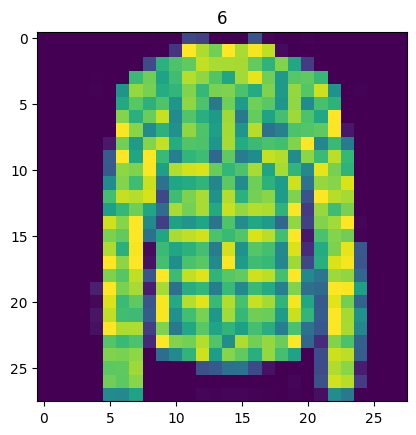

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [42]:
# 加载数据，输入特征：28*28像素的图像，输出标签：衣物类型
train_data = datasets.FashionMNIST('data', True, ToTensor(), download=True)
test_data = datasets.FashionMNIST('data', False, ToTensor(),  download=True)
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size, True)
test_dataloader = DataLoader(test_data, batch_size)
for X, y in train_dataloader:
    print('Shape of X ', X.shape)
    print('Shape of y ', y.shape, y.dtype)
    plt.imshow(X[0][0])
    plt.title(y[0].item())
    plt.show()
    break
set([clz for img, clz in test_data])


In [51]:
# 搭建模型
inputLayer = nn.Linear(28*28, 128, bias=True)
activateFunction = nn.Sigmoid()
outputLayer = nn.Linear(128, 10, bias=True)
softmax = nn.Softmax(1)

x = torch.randn(10, 28*28)
out = inputLayer(x)
print(out.shape)
out = activateFunction(out)
print(out.shape)
out = outputLayer(out)
print(out.shape)
out = softmax(out)
print(out.shape)

model = nn.Sequential(
    inputLayer,
    activateFunction,
    outputLayer
)
model

torch.Size([10, 128])
torch.Size([10, 128])
torch.Size([10, 10])
torch.Size([10, 10])


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [53]:
# 损失函数
loss_fn = nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)


In [58]:
# 训练
epoches = 10
for epoch in range(epoches):
    for X, y in train_dataloader:
        output = model(X.reshape(-1, 28*28))
        loss = loss_fn(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'\repoch: {epoch} loss: {loss.item()} ', end='')
    print()


epoch: 0 loss: 0.3486686944961548  
epoch: 1 loss: 0.42623475193977356 
epoch: 2 loss: 0.537195086479187   
epoch: 3 loss: 0.47252678871154785 
epoch: 4 loss: 0.379627525806427   
epoch: 5 loss: 0.3546232581138611  
epoch: 6 loss: 0.4045182764530182  
epoch: 7 loss: 0.6021144986152649  
epoch: 8 loss: 0.2538944482803345  
epoch: 9 loss: 0.8525348901748657  


In [73]:
# 测试
correct = 0
total = 0
with torch.no_grad():
    for X,y in test_dataloader:
        output = model(X.reshape(-1,28*28))
        _,predicted = torch.max(output, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print(f'正确率 {correct} / {total}')

正确率 8184 / 10000
